# Plots
- [x] [Activations](#activations)
- [x] [Flux weights](#flux_weights)
- [x] [Flux plot](#flux_plot)
- [x] [Flux comparison](#flux_comparison)
- [x] [Digitisation plot](#digi)
- [x] [Cross-sections](#cross_sections)
- [ ] [Events](#events)
- [ ] [Emission profiles](#profiles)

In [1]:
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager
import mplhep as hep
import seaborn as sns
import uproot

# Setup matplotlib style using mplhep
extra_styling = {
    "text.usetex": True,
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": False,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "axes.xmargin": 0
}

style = hep.style.ROOT
del style['xaxis.labellocation']
del style['yaxis.labellocation']
plt.style.use([style, extra_styling])

def save(name):
    """Save a matplotlib plot to file as both a pgf and pdf.

    Args:
        name (str): output path+name
    """
    plt.savefig("{}.pdf".format(name), bbox_inches="tight")
    plt.show()

<a id='activations'></a>

## Activations

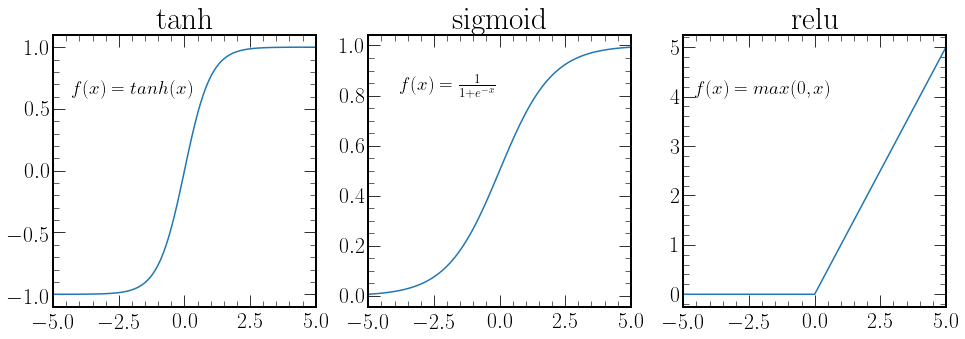

In [2]:
def tanh(x):
    return math.tanh(x)
    
def sigmoid(x):
    return 1/(1+math.exp(-x))

def relu(x):
    if x > 0:
        return float(x)
    else:
        return 0
    
x = np.arange(-5.0, 5.1, 0.1)
tanh_vec = np.vectorize(tanh, otypes=[np.float64])
tanh_result = tanh_vec(x)
sigmoid_vec = np.vectorize(sigmoid, otypes=[np.float64])
sigmoid_result = sigmoid_vec(x)
relu_vec = np.vectorize(relu, otypes=[np.float64])
relu_result = relu_vec(x)

fig, axs = plt.subplots(1, 3, figsize=(16, 5), gridspec_kw={"hspace": 0.3})
axs[0].plot(x, tanh_result)
axs[0].set_title("tanh")
axs[0].text(0.3, 0.8, "$f(x)=tanh(x)$", fontsize=19, horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[1].plot(x, sigmoid_result)
axs[1].set_title("sigmoid")
axs[1].text(0.3, 0.8, "$f(x)=\\frac{1}{1+e^{-x}}$", fontsize=19, horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)
axs[2].plot(x, relu_result)
axs[2].set_title("relu")
axs[2].text(0.3, 0.8, "$f(x)=max(0,x)$", fontsize=19, horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)
save("./diagrams/7-cvn/activations")

<a id='flux_weights'></a>

## Flux weights

In [3]:
# Open flux file
dir = uproot.open("./data/flux.root")["enufullfine"]

# Read CHIPS fluxes
nuel_cc_h = dir["CHIPSoffAXIS"]['enufullfine_nue_allpar_tot_cc_CHIPSoffAXIS'].values
anuel_cc_h = dir["CHIPSoffAXIS"]['enufullfine_anue_allpar_tot_cc_CHIPSoffAXIS'].values
numu_cc_h = dir["CHIPSoffAXIS"]['enufullfine_numu_allpar_tot_cc_CHIPSoffAXIS'].values
anumu_cc_h = dir["CHIPSoffAXIS"]['enufullfine_anumu_allpar_tot_cc_CHIPSoffAXIS'].values
nuel_nc_h = dir["CHIPSoffAXIS"]['enufullfine_nue_allpar_tot_nc_CHIPSoffAXIS'].values
anuel_nc_h = dir["CHIPSoffAXIS"]['enufullfine_anue_allpar_tot_nc_CHIPSoffAXIS'].values
numu_nc_h = dir["CHIPSoffAXIS"]['enufullfine_numu_allpar_tot_nc_CHIPSoffAXIS'].values
anumu_nc_h = dir["CHIPSoffAXIS"]['enufullfine_anumu_allpar_tot_nc_CHIPSoffAXIS'].values
nuel_flux_h = dir["CHIPSoffAXIS"]['enufullfine_nue_allpar_NoXSec_CHIPSoffAXIS'].values
anuel_flux_h = dir["CHIPSoffAXIS"]['enufullfine_anue_allpar_NoXSec_CHIPSoffAXIS'].values
numu_flux_h = dir["CHIPSoffAXIS"]['enufullfine_numu_allpar_NoXSec_CHIPSoffAXIS'].values
anumu_flux_h = dir["CHIPSoffAXIS"]['enufullfine_anumu_allpar_NoXSec_CHIPSoffAXIS'].values

# Read NoVA and MINOS fluxes
numu_flux_nova_h = dir["NOvA_FD_Shift"]["enufullfine_numu_allpar_NoXSec_NOvA_FD_Shift"].values
numu_flux_minos_h = dir["MINOS_FD"]["enufullfine_numu_allpar_NoXSec_MINOS_FD"].values

# Get the bin corresponding to 30 GeV
max_bin = np.where(dir["CHIPSoffAXIS"]['enufullfine_nue_allpar_tot_cc_CHIPSoffAXIS'].edges == 30.0)[0][0]

# Calculate the integrals up to 30 GeV
nuel_cc = np.trapz(nuel_cc_h[:max_bin])
anuel_cc = np.trapz(anuel_cc_h[:max_bin])
numu_cc = np.trapz(numu_cc_h[:max_bin])
anumu_cc = np.trapz(anumu_cc_h[:max_bin])
nuel_nc = np.trapz(nuel_nc_h[:max_bin])
anuel_nc = np.trapz(anuel_nc_h[:max_bin])
numu_nc = np.trapz(numu_nc_h[:max_bin])
anumu_nc = np.trapz(anumu_nc_h[:max_bin])

# Scale to get 6*10^20 POT
scale = (6*pow(10,20))/(50*pow(10,6))
nuel_cc = nuel_cc * scale
anuel_cc = anuel_cc * scale
numu_cc = numu_cc * scale
anumu_cc = anumu_cc * scale
nuel_nc = nuel_nc * scale
anuel_nc = anuel_nc * scale
numu_nc = numu_nc * scale
anumu_nc = anumu_nc * scale
nuel_tot = nuel_cc + nuel_nc
anuel_tot = anuel_cc + anuel_nc
numu_tot = numu_cc + numu_nc
anumu_tot = anumu_cc + anumu_nc
total = nuel_cc + anuel_cc + numu_cc + anumu_cc + nuel_nc + anuel_nc + numu_nc + anumu_nc

# Print values
print('###########################################################')
print('Events/6*10^20 POT/kt in the range [0,{}]...\n'.format(max))
print('nuel_cc: {}, frac: {}'.format(nuel_cc, nuel_cc/total))
print('anuel_cc: {}, frac: {}'.format(anuel_cc, anuel_cc/total))
print('numu_cc: {}, frac: {}'.format(numu_cc, numu_cc/total))
print('anumu_cc: {}, frac: {}'.format(anumu_cc, anumu_cc/total))
print('nuel_nc: {}, frac: {}'.format(nuel_nc, nuel_nc/total))
print('anuel_nc: {}, frac: {}'.format(anuel_nc, anuel_nc/total))
print('numu_nc: {}, frac: {}'.format(numu_nc, numu_nc/total))
print('anumu_nc: {}, frac: {}'.format(anumu_nc, anumu_nc/total))
print('Total: {}'.format(total))

print('\nnuel_tot: {}, frac: {}'.format(nuel_tot, (nuel_tot/total)))
print('anuel_tot: {}, frac: {}'.format(anuel_tot, (anuel_tot/total)))
print('numu_tot: {}, frac: {}'.format(numu_tot, (numu_tot/total)))
print('anumu_tot: {}, frac: {}'.format(anumu_tot, (anumu_tot/total)))
print('###########################################################')

# Save to file
weight_file = open('./data/event_weights.txt', 'w')
weight_file.write(str(nuel_tot/total) + '\n')
weight_file.write(str(anuel_tot/total) + '\n')
weight_file.write(str(numu_tot/total) + '\n')
weight_file.write(str(anumu_tot/total) + '\n')
weight_file.write(str(total) + '\n')
weight_file.close()

###########################################################
Events/6*10^20 POT/kt in the range [0,<built-in function max>]...

nuel_cc: 6.641224229179985, frac: 0.009420237455903322
anuel_cc: 0.5263524245342096, frac: 0.0007466040376737761
numu_cc: 509.9145947050906, frac: 0.7232878154071548
anumu_cc: 12.096573209805495, frac: 0.017158371424714946
nuel_nc: 2.191118185459738, frac: 0.0031079892635288036
anuel_nc: 0.18817003756334572, frac: 0.0002669095899735694
numu_nc: 169.05911184741962, frac: 0.2398017176847306
anumu_nc: 4.378271906224289, frac: 0.006210355136320382
Total: 704.9954165452772

nuel_tot: 8.832342414639722, frac: 0.012528226719432125
anuel_tot: 0.7145224620975553, frac: 0.0010135136276473455
numu_tot: 678.9737065525103, frac: 0.9630895330918855
anumu_tot: 16.474845116029783, frac: 0.02336872656103533
###########################################################


<a id='flux_plot'></a>

## Flux plot

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


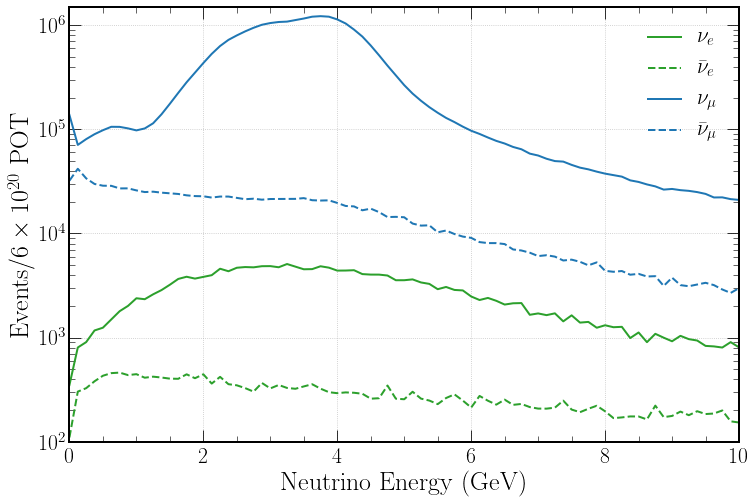

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8), gridspec_kw={"hspace": 0.3})
energies = np.arange(0.0, 30.0, 0.125)
axs.plot(energies, nuel_flux_h[:max_bin]*scale, color="tab:green", linewidth=2)
axs.plot(energies, anuel_flux_h[:max_bin]*scale, color="tab:green", linewidth=2, linestyle="dashed")
axs.plot(energies, numu_flux_h[:max_bin]*scale, color="tab:blue", linewidth=2)
axs.plot(energies, anumu_flux_h[:max_bin]*scale, color="tab:blue", linewidth=2, linestyle="dashed")

nuel = Line2D([0], [0], color="tab:green", linewidth=2, linestyle="solid", label=r"$\nu_{e}$")
anuel = Line2D([0], [0], color="tab:green", linewidth=2, linestyle="dashed", label=r"$\bar{\nu}_{e}$")
numu = Line2D([0], [0], color="tab:blue", linewidth=2, linestyle="solid", label=r"$\nu_{\mu}$")
anumu = Line2D([0], [0], color="tab:blue", linewidth=2, linestyle="dashed", label=r"$\bar{\nu}_{\mu}$")
axs.legend(handles=[nuel, anuel, numu, anumu], loc="upper right")

axs.set_yscale('log')
axs.set_ylim(1e2, 1.5e6)
axs.set_xlim(0, 10)
axs.set_ylabel(r"Events/$6\times10^{20}$ POT")
axs.set_xlabel("Neutrino Energy (GeV)")
axs.grid()
               
save("./diagrams/5-chips/flux")

<a id='flux_comparison'></a>

## Flux comparison

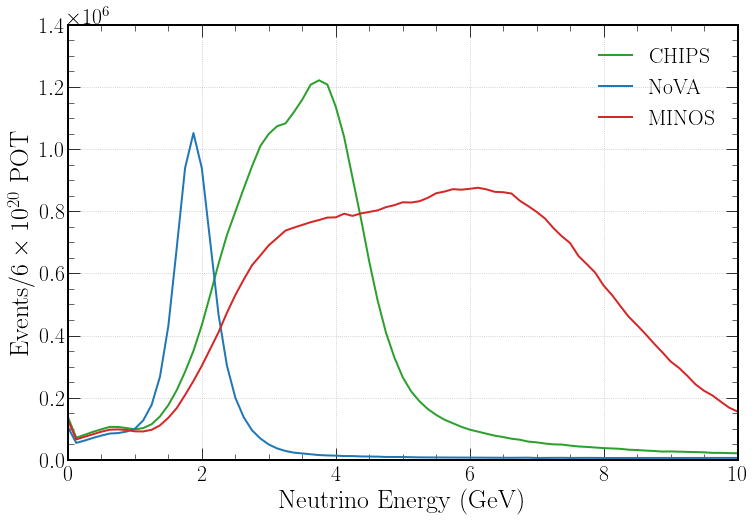

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8), gridspec_kw={"hspace": 0.3})
energies = np.arange(0.0, 30.0, 0.125)
axs.plot(energies, numu_flux_h[:max_bin]*scale, color="tab:green", linewidth=2)
axs.plot(energies, numu_flux_nova_h[:max_bin]*scale, color="tab:blue", linewidth=2)
axs.plot(energies, numu_flux_minos_h[:max_bin]*scale, color="tab:red", linewidth=2)

chips = Line2D([0], [0], color="tab:green", linewidth=2, linestyle="solid", label=r"CHIPS")
nova = Line2D([0], [0], color="tab:blue", linewidth=2, linestyle="solid", label=r"NoVA")
minos = Line2D([0], [0], color="tab:red", linewidth=2, linestyle="solid", label=r"MINOS")
axs.legend(handles=[chips, nova, minos], loc="upper right")

axs.set_ylim(0, 1.4e6)
axs.set_xlim(0, 10)
axs.set_ylabel(r"Events/$6\times10^{20}$ POT")
axs.set_xlabel("Neutrino Energy (GeV)")
axs.grid()
               
save("./diagrams/5-chips/flux_comparison")

<a id='digi'></a>

## Digitisation plot

In [6]:
digi_file = uproot.open("./data/digi.root")
raw = digi_file["rawDigiPDF"].values
raw = np.rot90(raw, 1)
pois = digi_file["poissonDigiPDF_digiNorm_ln"].values
pois = np.rot90(pois, 1)
bins = np.arange(0,11,1)

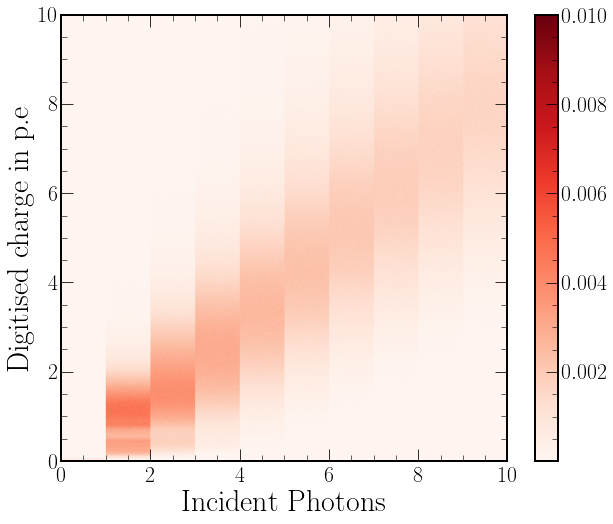

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
plt.imshow(raw, cmap="Reds", vmin=1e-5, vmax=1e-2, extent=[bins.min(), bins.max(),bins.min(),bins.max()])
plt.colorbar(shrink=0.82)
axs.set_xlabel('Incident Photons', fontsize = 30)
axs.set_ylabel('Digitised charge in p.e', fontsize = 30)
save("./diagrams/4-exp/digi_method")

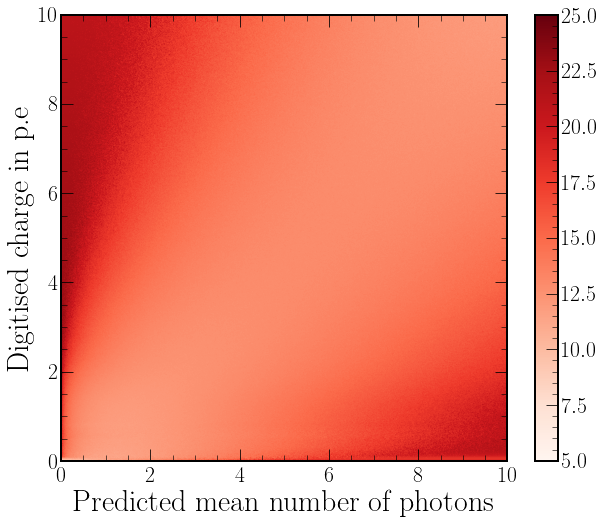

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
plt.imshow(pois, cmap=plt.cm.Reds, vmin=5, vmax=25, extent=[bins.min(), bins.max(),bins.min(),bins.max()])
plt.colorbar(shrink=0.82)
axs.set_xlabel('Predicted mean number of photons', fontsize = 30)
axs.set_ylabel('Digitised charge in p.e', fontsize = 30)
save("./diagrams/4-exp/digi_likelihood")

<a id='cross_sections'></a>

## Cross-sections

In [9]:
def cross_sections(in_file, out_name, y_max, nu_type):
    cs_file = uproot.open(in_file)
    
    energies = cs_file[out_name]["tot_cc"].xvalues
    tot_cc_g = cs_file[out_name]["tot_cc"].yvalues/energies
    coh_cc_g = cs_file[out_name]["coh_cc"].yvalues/energies
    mec_cc_g = cs_file[out_name]["mec_cc"].yvalues/energies
    try:
        qel_cc_g = cs_file[out_name]["qel_cc_p"].yvalues/energies
    except:
        qel_cc_g = cs_file[out_name]["qel_cc_n"].yvalues/energies
    dis_cc_p_g = cs_file[out_name]["dis_cc_p"].yvalues/energies
    dis_cc_n_g = cs_file[out_name]["dis_cc_n"].yvalues/energies
    res_cc_p_g = cs_file[out_name]["res_cc_p"].yvalues/energies
    res_cc_n_g = cs_file[out_name]["res_cc_n"].yvalues/energies
    tot_nc_g = cs_file[out_name]["tot_nc"].yvalues/energies
    coh_nc_g = cs_file[out_name]["coh_nc"].yvalues/energies
    mec_nc_g = cs_file[out_name]["mec_nc"].yvalues/energies
    qel_nc_p_g = cs_file[out_name]["qel_nc_p"].yvalues/energies
    qel_nc_n_g = cs_file[out_name]["qel_nc_n"].yvalues/energies
    dis_nc_p_g = cs_file[out_name]["dis_nc_p"].yvalues/energies
    dis_nc_n_g = cs_file[out_name]["dis_nc_n"].yvalues/energies
    res_nc_p_g = cs_file[out_name]["res_nc_p"].yvalues/energies
    res_nc_n_g = cs_file[out_name]["res_nc_n"].yvalues/energies

    dis_cc_g = dis_cc_p_g + dis_cc_n_g
    res_cc_g = res_cc_p_g + res_cc_n_g
    dis_nc_g = dis_nc_p_g + dis_nc_n_g
    qel_nc_g = qel_nc_p_g + qel_nc_n_g
    res_nc_g = res_nc_p_g + res_nc_n_g
    
    [tot_cc_g, qel_cc_g, res_cc_g, dis_cc_g, coh_cc_g, mec_cc_g]
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={"wspace": 0.1})
    axs[0].plot(energies, tot_cc_g, color="black", linewidth=2)
    axs[0].plot(energies, qel_cc_g, color="tab:blue", linewidth=2)
    axs[0].plot(energies, dis_cc_g, color="tab:red", linewidth=2)
    axs[0].plot(energies, res_cc_g, color="tab:green", linewidth=2)
    axs[0].plot(energies, coh_cc_g, color="yellow", linewidth=2)
    axs[0].plot(energies, mec_cc_g, color="cyan", linewidth=2)
    
    axs[1].plot(energies, tot_nc_g, color="black", linewidth=2)
    axs[1].plot(energies, qel_nc_g, color="tab:blue", linewidth=2)
    axs[1].plot(energies, dis_nc_g, color="tab:red", linewidth=2)
    axs[1].plot(energies, res_nc_g, color="tab:green", linewidth=2)
    axs[1].plot(energies, coh_nc_g, color="yellow", linewidth=2)
    axs[1].plot(energies, mec_nc_g, color="cyan", linewidth=2)
    
    tot = Line2D([0], [0], color="black", linewidth=2, linestyle="solid", label=r"Total")
    qel = Line2D([0], [0], color="tab:blue", linewidth=2, linestyle="solid", label=r"QE")
    dis = Line2D([0], [0], color="tab:red", linewidth=2, linestyle="solid", label=r"DIS")
    res = Line2D([0], [0], color="tab:green", linewidth=2, linestyle="solid", label=r"Res")
    coh = Line2D([0], [0], color="yellow", linewidth=2, linestyle="solid", label=r"Coh")
    mec = Line2D([0], [0], color="cyan", linewidth=2, linestyle="solid", label=r"MEC")
    axs[1].legend(handles=[tot, qel, dis, res, coh, mec], loc="upper right")

    axs[0].set_ylim(0, y_max)
    axs[0].set_xlim(0, 10)
    axs[1].set_ylim(0, y_max)
    axs[1].set_xlim(0, 10)
    axs[1].label_outer()
    if nu_type == 0:
        axs[0].set_ylabel(r"$\nu_{e}$ $\sigma_{O^{16}}$/$E_{\nu}$ ($10^{-38}cm^{2}$/GeV)")
    else:
        axs[0].set_ylabel(r"$\nu_{\mu}$ $\sigma_{O^{16}}$/$E_{\nu}$ ($10^{-38}cm^{2}$/GeV)")
    axs[0].set_xlabel("Neutrino Energy (GeV)")
    axs[1].set_xlabel("Neutrino Energy (GeV)")
    axs[0].grid()
    save("./diagrams/5-chips/xsec_" + out_name)

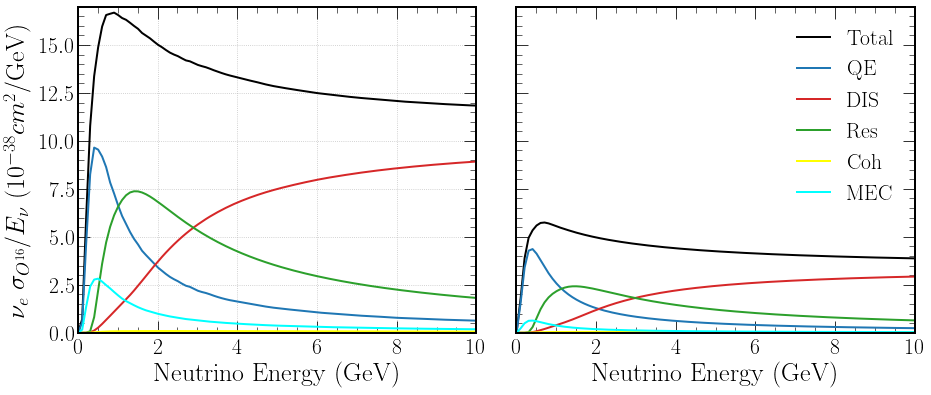

In [10]:
cross_sections('./data/xsec_nuel.root', 'nu_e_O16', 17, 0)

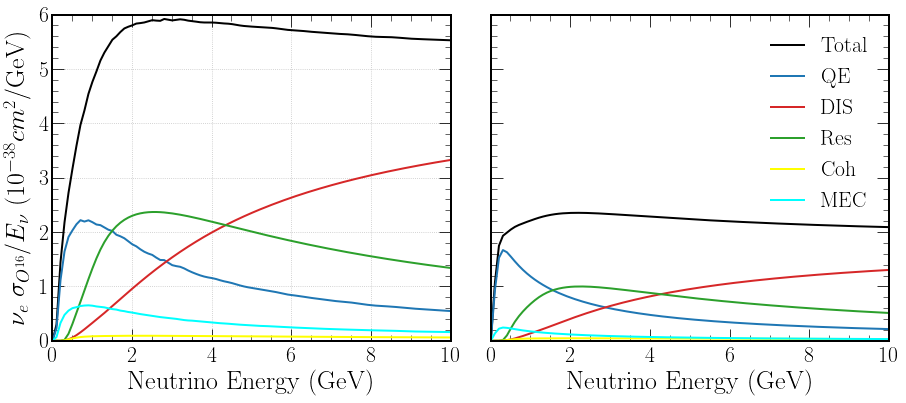

In [11]:
cross_sections('./data/xsec_anuel.root', 'nu_e_bar_O16', 6, 0)

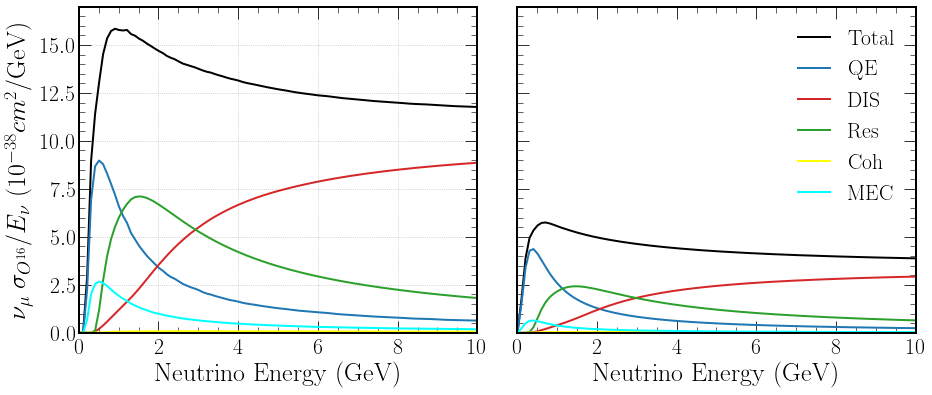

In [12]:
cross_sections('./data/xsec_numu.root', 'nu_mu_O16', 17, 1)

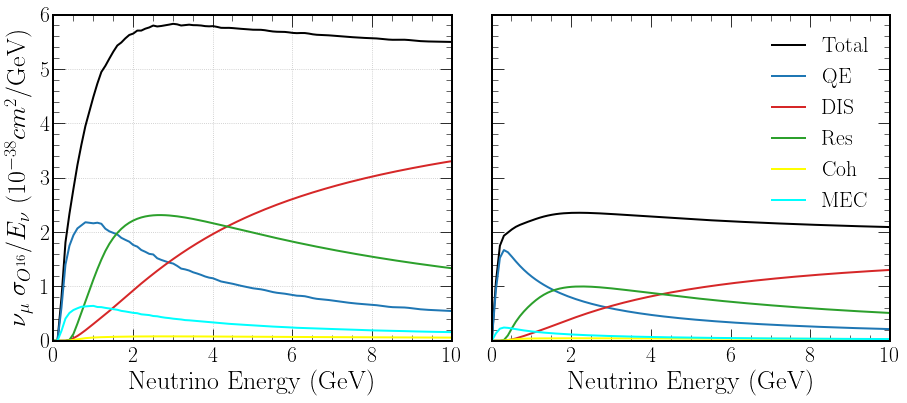

In [13]:
cross_sections('./data/xsec_anumu.root', 'nu_mu_bar_O16', 6, 1)

<a id='events'></a>

## Events

In [ ]:
weights_file = open("event_weights.txt", "r")
nuel_w = float(weights_file.readline())
anuel_w = float(weights_file.readline())
numu_w = float(weights_file.readline())
anumu_w = float(weights_file.readline())
total = float(weights_file.readline())
weights_file.close()
print("nuel: {}, anuel: {}, numu: {}, anumu:{}, total: {}".format(
    nuel_w, anuel_w, numu_w, anumu_w, total
))

nuel_file = ROOT.TFile("../data/events_nuel.root")
anuel_file = ROOT.TFile("../data/events_anuel.root")
numu_file = ROOT.TFile("../data/events_numu.root")
anumu_file = ROOT.TFile("../data/events_anumu.root")

nuel_t_all_h = nuel_file.Get("int_types_all")
anuel_t_all_h = anuel_file.Get("int_types_all")
numu_t_all_h = numu_file.Get("int_types_all")
anumu_t_all_h = anumu_file.Get("int_types_all")

nuel_t_passed_h = nuel_file.Get("int_types_passed")
anuel_t_passed_h = anuel_file.Get("int_types_passed")
numu_t_passed_h = numu_file.Get("int_types_passed")
anumu_t_passed_h = anumu_file.Get("int_types_passed")

nuel_t_passed_h.Divide(nuel_t_all_h)
anuel_t_passed_h.Divide(anuel_t_all_h)
numu_t_passed_h.Divide(numu_t_all_h)
anumu_t_passed_h.Divide(anumu_t_all_h)

nuel_num = nuel_t_all_h.GetEntries()
anuel_num = anuel_t_all_h.GetEntries()
numu_num = numu_t_all_h.GetEntries()
anumu_num = anumu_t_all_h.GetEntries()
total_num = (nuel_w*float(nuel_num)) + (anuel_w*float(anuel_num)) + (numu_w*float(numu_num)) + (anumu_w*float(anumu_num))
event_scale = total/total_num
print("Entries total: {}, total: {}, scale: {}".format(total_num, total, event_scale))

nuel_t_all_h.SetFillColor(ROOT.kGreen+1)
nuel_t_all_h.SetTitle("#nu_{e}")
nuel_t_all_h.Scale(nuel_w)
nuel_t_all_h.Scale(event_scale)
anuel_t_all_h.SetFillColor(ROOT.kGreen+2)
anuel_t_all_h.SetTitle("#bar{#nu}_{e}")
anuel_t_all_h.Scale(anuel_w)
anuel_t_all_h.Scale(event_scale)
numu_t_all_h.SetFillColor(ROOT.kBlue+1)
numu_t_all_h.SetTitle("#nu_{#mu}")
numu_t_all_h.Scale(numu_w)
numu_t_all_h.Scale(event_scale)
anumu_t_all_h.SetFillColor(ROOT.kBlue+2)
anumu_t_all_h.SetTitle("#bar{#nu}_{#mu}")
anumu_t_all_h.Scale(anumu_w)
anumu_t_all_h.Scale(event_scale)

hists_t = [nuel_t_all_h, anuel_t_all_h, numu_t_all_h, anumu_t_all_h]
utils.plot(hists_t, "; Interaction Type Code; Number of Events/6#times10^{20}POT/kt", "../diagrams/6-cvn/events_types.png",
           0, 28, 0.1, 200, opt="sameHIST", leg_opt='FB', stack=True, log_y=True)

int_types = 27
int_names = [
    "CCQE", "NCQE",
    "CCNuPtoLPPiPlus", "CCNuNtoLPPiZero", "CCNuNtoLNPiPlus", 
    "NCNuPtoNuPPiZero", "NCNuPtoNuNPiPlus", "NCNuNtoNuNPiZero", "NCNuNtoNuPPiMinus", 
    "CCNuBarNtoLNPiMinus", "CCNuBarPtoLNPiZero", "CCNuBarPtoLPPiMinus",
    "NCNuBarPtoNuBarPPiZero", "NCNuBarPtoNuBarNPiPlus", "NCNuBarNtoNuBarNPiZero", "NCNuBarNtoNuBarPPiMinus",
    "CCOtherResonant", "NCOtherResonant", "CCMEC", "NCMEC", "IMD",
    "CCDIS", "NCDIS", "NCCoh", "CCCoh", "ElasticScattering", "InverseMuDecay",
    "CosmicMuon"
]

name_e = "nu_energy_passed_"
ccqel_e = numu_file.Get(name_e + "CCQE")
ccmec_e = numu_file.Get(name_e + "CCMEC")
onepi_e = numu_file.Get(name_e + "CCNuPtoLPPiPlus")
onepi_e.Add(numu_file.Get(name_e + "CCNuNtoLPPiZero"))
onepi_e.Add(numu_file.Get(name_e + "CCNuNtoLNPiPlus"))
cccoh_e = numu_file.Get(name_e + "CCCoh")
ccdis_e = numu_file.Get(name_e + "CCDIS")
ccother_e = numu_file.Get(name_e + "CCOtherResonant")
nc_e = numu_file.Get(name_e + "NCQE")
nc_e.Add(numu_file.Get(name_e + "NCNuPtoNuPPiZero"))
nc_e.Add(numu_file.Get(name_e + "NCNuPtoNuNPiPlus"))
nc_e.Add(numu_file.Get(name_e + "NCNuNtoNuNPiZero"))
nc_e.Add(numu_file.Get(name_e + "NCNuNtoNuPPiMinus"))
nc_e.Add(numu_file.Get(name_e + "NCMEC"))
nc_e.Add(numu_file.Get(name_e + "NCDIS"))
nc_e.Add(numu_file.Get(name_e + "NCCoh"))
nc_e.Add(numu_file.Get(name_e + "NCOtherResonant"))
#anumu_e = anumu_file.Get("h_nuEnergy_Other")
#nuel_e = nuel_file.Get("h_nuEnergy_Other")
#anuel_e = anuel_file.Get("h_nuEnergy_Other")
#for i in range(int_types):
#    name_e = "nu_energy_passed_"
#    name_e += int_names[i]
#    anumu_e.Add(anumu_file.Get(name_e))
#    nuel_e.Add(nuel_file.Get(name_e))
#    anuel_e.Add(anuel_file.Get(name_e))

ccqel_e.Rebin(2) 
ccqel_e.SetFillColor(2) 
ccqel_e.SetTitle("CCQE") 
ccmec_e.Rebin(2) 
ccmec_e.SetFillColor(3) 
ccmec_e.SetTitle("CCMEC")
onepi_e.Rebin(2) 
onepi_e.SetFillColor(4) 
onepi_e.SetTitle("CC1#pi")
cccoh_e.Rebin(2) 
cccoh_e.SetFillColor(5) 
cccoh_e.SetTitle("CCCoh")
ccdis_e.Rebin(2) 
ccdis_e.SetFillColor(6) 
ccdis_e.SetTitle("CCDIS")
ccother_e.Rebin(2) 
ccother_e.SetFillColor(7) 
ccother_e.SetTitle("CCother")
nc_e.Rebin(2) 
nc_e.SetFillColor(8) 
nc_e.SetTitle("NC")  
#anumu_e.Rebin(2) 
#anumu_e.SetFillColor(9) 
#anumu_e.SetTitle("#bar{#nu}_{#mu}")
#nuel_e.Rebin(2) 
#nuel_e.SetFillColor(10) 
#nuel_e.SetTitle("#nu_{e}")
#anuel_e.Rebin(2) 
#anuel_e.SetFillColor(11) 
#anuel_e.SetTitle("#bar{#nu}_{e}")

ccqel_e.Scale(numu_w) 
ccqel_e.Scale(event_scale)
ccmec_e.Scale(numu_w) 
ccmec_e.Scale(event_scale)
onepi_e.Scale(numu_w) 
onepi_e.Scale(event_scale)
cccoh_e.Scale(numu_w) 
cccoh_e.Scale(event_scale)
ccdis_e.Scale(numu_w) 
ccdis_e.Scale(event_scale)
ccother_e.Scale(numu_w) 
ccother_e.Scale(event_scale)
nc_e.Scale(numu_w) 
nc_e.Scale(event_scale)
#anumu_e.Scale(anumu_w) 
#anumu_e.Scale(event_scale)
#nuel_e.Scale(nuel_w) 
#nuel_e.Scale(event_scale)
#anuel_e.Scale(anuel_w) 
#anuel_e.Scale(event_scale)

hists_e = [ccqel_e, ccmec_e, onepi_e, cccoh_e, ccdis_e, ccother_e, nc_e]
utils.plot(hists_e, "; Neutrino Energy (MeV); Number of Events/6#times10^{20}POT/kt", "../diagrams/6-cvn/events_energies.png",
           0, 10000, 1, 50, opt="same PFC HIST", leg_opt="FB", stack=True, log_y=True)

# Make stacked final states plot
name_s = "final_codes_passed_"
ccqel_s = numu_file.Get(name_s + "CCQE")
ccmec_s = numu_file.Get(name_s + "CCMEC")
onepi_s = numu_file.Get(name_s + "CCNuPtoLPPiPlus")
onepi_s.Add(numu_file.Get(name_s + "CCNuNtoLPPiZero"))
onepi_s.Add(numu_file.Get(name_s + "CCNuNtoLNPiPlus"))
cccoh_s = numu_file.Get(name_s + "CCCoh")
ccdis_s = numu_file.Get(name_s + "CCDIS")
ccother_s = numu_file.Get(name_s + "CCOtherResonant")
nc_s = numu_file.Get(name_s + "NCQE")
nc_s.Add(numu_file.Get(name_s + "NCNuPtoNuPPiZero"))
nc_s.Add(numu_file.Get(name_s + "NCNuPtoNuNPiPlus"))
nc_s.Add(numu_file.Get(name_s + "NCNuNtoNuNPiZero"))
nc_s.Add(numu_file.Get(name_s + "NCNuNtoNuPPiMinus"))
nc_s.Add(numu_file.Get(name_s + "NCMEC"))
nc_s.Add(numu_file.Get(name_s + "NCDIS"))
nc_s.Add(numu_file.Get(name_s + "NCCoh"))
nc_s.Add(numu_file.Get(name_s + "NCOtherResonant"))

ccqel_s.SetFillColor(2) 
ccqel_s.SetTitle("CCQE") 
ccmec_s.SetFillColor(3) 
ccmec_s.SetTitle("CCMEC")
onepi_s.SetFillColor(4) 
onepi_s.SetTitle("CC1#pi")
cccoh_s.SetFillColor(5) 
cccoh_s.SetTitle("CCCoh")
ccdis_s.SetFillColor(6) 
ccdis_s.SetTitle("CCDIS")
ccother_s.SetFillColor(7) 
ccother_s.SetTitle("CCother")
nc_s.SetFillColor(8) 
nc_s.SetTitle("NC")  

ccqel_s.Scale(numu_w) 
ccqel_s.Scale(event_scale)
ccmec_s.Scale(numu_w) 
ccmec_s.Scale(event_scale)
onepi_s.Scale(numu_w) 
onepi_s.Scale(event_scale)
cccoh_s.Scale(numu_w) 
cccoh_s.Scale(event_scale)
ccdis_s.Scale(numu_w) 
ccdis_s.Scale(event_scale)
ccother_s.Scale(numu_w) 
ccother_s.Scale(event_scale)
nc_s.Scale(numu_w) 
nc_s.Scale(event_scale)

hists_s = [ccqel_s, ccmec_s, onepi_s, cccoh_s, ccdis_s, ccother_s, nc_s]
utils.plot(hists_s, "; Final State Type Code; Number of Events/6#times10^{20}POT/kt", "../diagrams/6-cvn/events_states.png",
           0, 33, 0, 200, opt="same PFC HIST", leg_opt="FB", stack=True)

nuel_file.Close()
anuel_file.Close()
numu_file.Close()
anumu_file.Close()

<a id='profiles'></a>

## Emission profiles

In [ ]:
el_file = ROOT.TFile("../data/profile_electrons.root")
mu_file = ROOT.TFile("../data/profile_muons.root")
pi_file = ROOT.TFile("../data/profile_pions.root")
pr_file = ROOT.TFile("../data/profile_protons.root")

el_d = el_file.Get("fRho")
mu_d = mu_file.Get("fRho")
pi_d = pi_file.Get("fRho")
pr_d = pr_file.Get("fRho")

el_d.SetLineColor(ROOT.kGreen + 1)
el_d.SetTitle("e")
mu_d.SetLineColor(ROOT.kRed + 1)
mu_d.SetTitle("#mu")
pi_d.SetLineColor(ROOT.kBlue + 1)
pi_d.SetTitle("#pi^{#pm}")
pr_d.SetLineColor(ROOT.kBlack)
pr_d.SetTitle("P")

hists = [el_d, mu_d, pi_d, pr_d]
utils.plot(hists, "Distance (cm) Fraction of emitted photons", "../diagrams/6-cvn/emission_distance.png",
           0, 1400, 0, 0.006, opt="SAME", leg_opt="L")

ROOT.gStyle.SetOptLogz(1)

# Get the normalised emission profiles
el_g = el_file.Get("fGFine")
el_g.GetXaxis().SetTitle("Cosine emission angle")
el_g.GetYaxis().SetTitle("Distance (cm)")
mu_g = mu_file.Get("fGFine")
mu_g.GetXaxis().SetTitle("Cosine emission angle")
mu_g.GetYaxis().SetTitle("Distance (cm)")
pi_g = pi_file.Get("fGFine")
pi_g.GetXaxis().SetTitle("Cosine emission angle")
pi_g.GetYaxis().SetTitle("Distance (cm)")
pr_g = pr_file.Get("fGFine")
pr_g.GetXaxis().SetTitle("Cosine emission angle")
pr_g.GetYaxis().SetTitle("Distance (cm)")

profile_c = ROOT.TCanvas("profile_c", "profile_c", 1000, 800)
profile_c.SetFillStyle(4000)
# Number of PADS
Nx = 2
Ny = 2
# Margins
lMargin = 0.1
rMargin = 0.02
bMargin = 0.1
tMargin = 0.05
# Canvas setup
Partition(profile_c, Nx, Ny, lMargin, rMargin, bMargin, tMargin)

palette = ROOT.TPaletteAxis
pad = ROOT.TPad


#ROOT.TPad *pad[Nx][Ny]

pad = [[]]

for i in range(Nx):
    for j in range(Ny):
        profile_c.cd(0)
        # Get the pads previously created.
        pad[i][j] = ROOT.gROOT.FindObject("pad_{}_{}".format(i, j))
        ROOT.gPad.SetLogz()
        pad[i][j].Draw()
        pad[i][j].SetFillStyle(4000)
        pad[i][j].SetFrameFillStyle(4000)
        pad[i][j].cd()
        # Size factors
        xFactor = pad[0][0].GetAbsWNDC() / pad[i][j].GetAbsWNDC()
        yFactor = pad[0][0].GetAbsHNDC() / pad[i][j].GetAbsHNDC()
        hFrame = el_g.Clone("h_{}_{}".format(i, j))
        hFrame.Reset()
        # Format for y axis
        hFrame.GetYaxis().SetRangeUser(10, 1400)
        hFrame.GetYaxis().SetLabelFont(43)
        hFrame.GetYaxis().SetLabelSize(16)
        hFrame.GetYaxis().SetLabelOffset(0.02)
        hFrame.GetYaxis().SetTitleFont(43)
        hFrame.GetYaxis().SetTitleSize(30)
        hFrame.GetYaxis().SetTitleOffset(2.5)
        hFrame.GetYaxis().CenterTitle()
        hFrame.GetYaxis().SetNdivisions(505)
        hFrame.GetYaxis().SetTickLength(xFactor * 0.04 / yFactor)
        # Format for x axis
        hFrame.GetXaxis().SetRangeUser(0.3, 1.1)
        hFrame.GetXaxis().SetLabelFont(43)
        hFrame.GetXaxis().SetLabelSize(16)
        hFrame.GetXaxis().SetLabelOffset(0.02)
        hFrame.GetXaxis().SetTitleFont(43)
        hFrame.GetXaxis().SetTitleSize(30)
        hFrame.GetXaxis().SetTitleOffset(2.5)
        hFrame.GetXaxis().CenterTitle()
        hFrame.GetXaxis().SetNdivisions(505)
        hFrame.GetXaxis().SetTickLength(yFactor * 0.06 / xFactor)
        # Format for the z axis
        hFrame.GetZaxis().SetRangeUser(0, 0.01)

        # Draw the frame and the plot
        hFrame.Draw()
        text = ROOT.TLatex(.1, .93, "hello")

        if i==0 and j==0:
            text.SetTextSize(2.6 / 30.)
            text.DrawText(0.375, 1200, "charged pion")
            pi_g.Draw("sameCOL")
        if i==0 and j==1:
            text.SetTextSize(3 / 30.)
            text.DrawText(0.375, 1200, "electron")
            el_g.Draw("sameCOL")
        if i==1 and j==0:
            text.SetTextSize(2.6 / 30.)
            text.DrawText(0.375, 1200, "proton")
            pr_g.Draw("sameCOL")
        if i==1 and j==1:
            text.SetTextSize(3 / 30.)
            text.DrawText(0.375, 1200, "muon")
            mu_g.Draw("sameCOL")
            palette = ROOT.TPaletteAxis(0.90, 0.1, 0.93, 0.95, mu_g)

        ROOT.gPad.Update()
        ROOT.gPad.RedrawAxis()
        l = ROOT.TLine()
        l.SetLineWidth(3)
        l.DrawLine(ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymin(), ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymin())
        l.DrawLine(ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymin(), ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymax())
        l.DrawLine(ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymax(), ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymax())
        l.DrawLine(ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymin(), ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymax())

profile_c.cd()
palette.Draw("same")
profile_c.SetLogz()
profile_c.Draw()

# Save canvas as png and root macro
profile_c.SaveAs("../diagrams/6-cvn/emission_profile.png")

el_file.Close()
mu_file.Close()
pi_file.Close()
pr_file.Close()